In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
def convert_to_float(value):
    return float(value.replace("ms", "")) if isinstance(value, str) else value

file_path = "../../output/5_4/5_4_results.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Results")

# 提取数据
methods = df["Method"].values
x_values = np.array(df.columns[1:], dtype=int)  # log2(N) 作为 x 轴

# 获取不同方法的数据
bcgbs = df.iloc[0, 1:].apply(convert_to_float).values  # BCGBS
bcgbs_as = df.iloc[1, 1:].apply(convert_to_float).values  # BCGBS_AS
bcgbs_as_dp = df.iloc[2, 1:].apply(convert_to_float).values  # BCGBS_AS_DP
wo_io = df.iloc[3, 1:].apply(convert_to_float).values  # BCGBS_AS_DP
wi_io = df.iloc[4, 1:].apply(convert_to_float).values  # BCGBS_AS_DP

# 计算加速比
speedup_as = bcgbs / bcgbs_as
speedup_as_dp = bcgbs_as / bcgbs_as_dp
speedup_io = wo_io / wi_io

[1.21722365 1.25       1.24358974 1.23989899 1.25093633 1.25615764
 1.2454435 ]


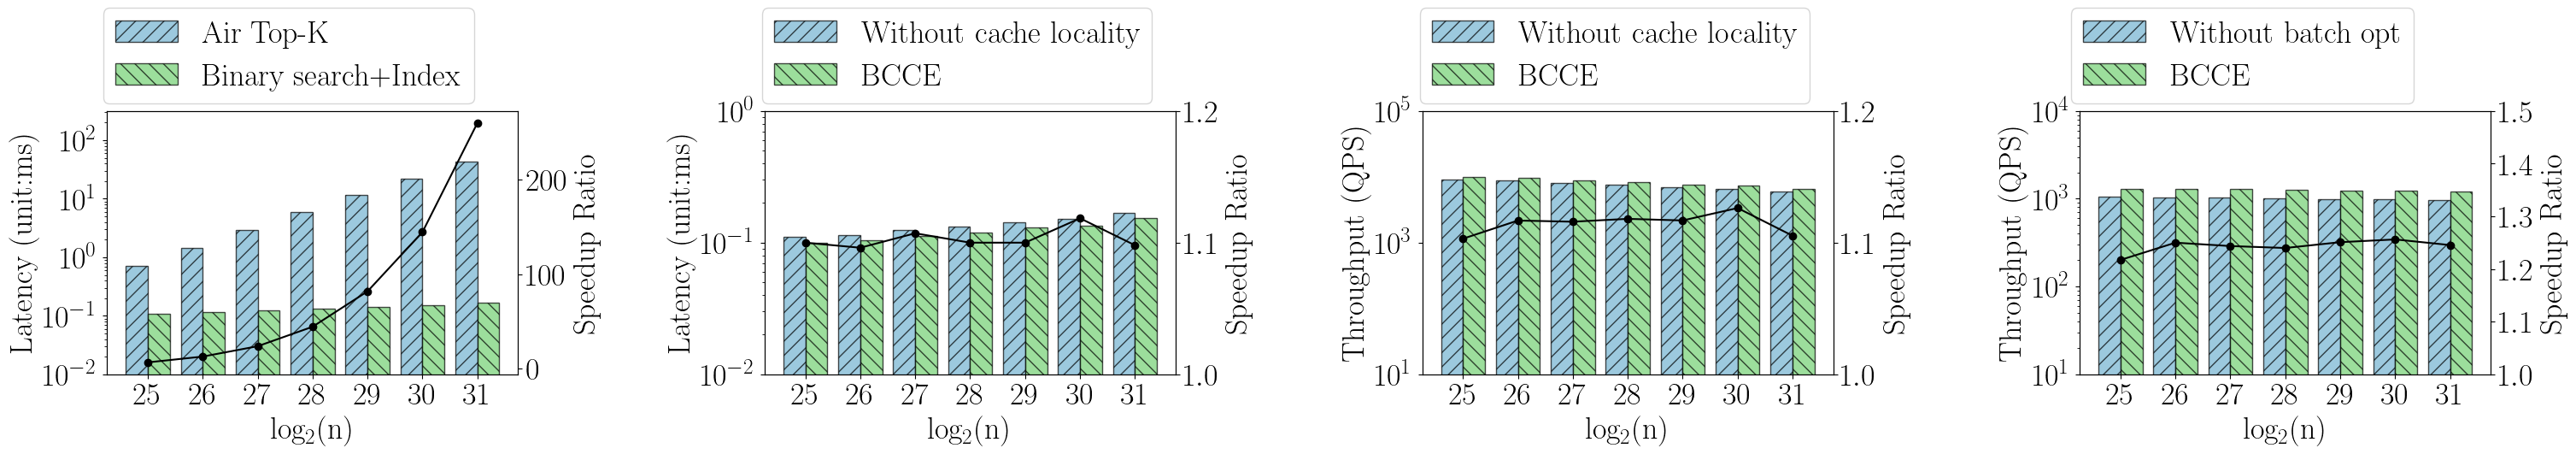

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 读取 Excel 文件
def convert_to_float(value):
    return float(value.replace("ms", "")) if isinstance(value, str) else value

file_path = "../../output/5_4/5_4_results.xlsx"
xls = pd.ExcelFile(file_path)
df = xls.parse("Results")

color_blue = "#72b3d0"  # BCCE 的颜色
color_green = "#72d072"  # baseline 的颜色

# 提取数据
methods = df["Method"].values
x_values = np.array(df.columns[1:], dtype=int)  # log2(N) 作为 x 轴

# 获取不同方法的数据
airtopK = df.iloc[0, 1:].apply(convert_to_float).values  # BCGBS
bcgbs_as = df.iloc[1, 1:].apply(convert_to_float).values  # BCGBS_AS
bcgbs_as_dp = df.iloc[2, 1:].apply(convert_to_float).values  # BCGBS_AS_DP
wo_io = df.iloc[3, 1:].apply(convert_to_float).values  # BCGBS_AS_DP
wi_io = df.iloc[4, 1:].apply(convert_to_float).values  # BCGBS_AS_DP

# 计算加速比
speedup_as = airtopK / bcgbs_as
speedup_as_dp = bcgbs_as / bcgbs_as_dp
speedup_io = wo_io / wi_io

from matplotlib import rcParams
rcParams["font.size"] = 26
rcParams["font.family"] = "Times New Roman"
rcParams["text.usetex"] = True
rcParams["font.family"] = "serif"

y_min_time, y_max_time = 10**1, 10**4

fig, axes = plt.subplots(1, 4, figsize=(36, 4))

plt.subplots_adjust(wspace=0.6)

ax1 = axes[0]
ax1.set_xticks(x_values)  # 设定 x 轴刻度点
ax1.set_xticklabels([x + 1 for x in x_values])
ax1.set_ylabel("Latency (unit:ms)")
ax1.set_xlabel('log$_2$(n)')
ax1.set_yscale('log')
ax1.set_ylim(10**-2, 10**2.5)
ax1.bar(x_values - 0.2, airtopK, width=0.4, label="Air Top-K", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax1.bar(x_values + 0.2, bcgbs_as, width=0.4, label="Binary search+Index", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax1.legend(ncols=1, bbox_to_anchor=(0.93,1.45))
ax2 = ax1.twinx()
ax2.set_ylabel("Speedup Ratio")
ax2.plot(x_values, speedup_as, 'ko-', label="Speedup")

# 画第二张图（BCGBS_AS vs BCGBS_AS_DP）
ax1 = axes[1]
ax1.set_xticks(x_values)  # 设定 x 轴刻度点
ax1.set_xticklabels([x + 1 for x in x_values])
ax1.set_ylabel("Latency (unit:ms)")
ax1.set_xlabel('log$_2$(n)')
ax1.set_yscale('log')
ax1.set_ylim(10**-2, 10**0)
ax1.bar(x_values - 0.2, bcgbs_as, width=0.4, label="Without cache locality", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax1.bar(x_values + 0.2, bcgbs_as_dp, width=0.4, label="BCCE", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax1.legend(ncols=1, bbox_to_anchor=(0.98,1.45))
ax2 = ax1.twinx()
ax2.set_ylim(1.00, 1.20)  # 调整右侧 y 轴范围
ax2.set_yticks(np.arange(1, 1.21, 0.1))  # 设置刻度为 1 到 1.2，间隔为 0.05
ax2.set_ylabel("Speedup Ratio")
ax2.plot(x_values, speedup_as_dp, 'ko-', label="Speedup")

# 画第二张图（BCGBS_AS vs BCGBS_AS_DP）
ax1 = axes[2]
ax1.set_ylabel("Throughput (QPS)")
ax1.set_xticks(x_values)  # 设定 x 轴刻度点
ax1.set_xticklabels([x + 1 for x in x_values])
ax1.set_xlabel('log$_2$(n)')
ax1.set_yscale('log')
ax1.set_ylim(y_min_time, 10**5)
ax1.bar(x_values - 0.2, 1000 / bcgbs_as, width=0.4, label="Without cache locality", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax1.bar(x_values + 0.2, 1000 / bcgbs_as_dp, width=0.4, label="BCCE", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax1.legend(ncols=1, bbox_to_anchor=(0.98,1.45))
ax2 = ax1.twinx()
ax2.set_ylim(1.00, 1.20)  # 调整右侧 y 轴范围
ax2.set_yticks(np.arange(1, 1.21, 0.1))  # 设置刻度为 1 到 1.2，间隔为 0.05
random_offsets = np.random.random(len(speedup_as_dp)) * 0.02
ax2.set_ylabel("Speedup Ratio")
speedup_as_dp_noisy = speedup_as_dp * (1 + random_offsets)
ax2.plot(x_values, speedup_as_dp_noisy, 'ko-', label="Speedup")

# 画第三张图（WO_IO vs WI_OP）
ax1 = axes[3]
ax1.set_ylim(0, 2)
ax1.set_ylabel("Throughput (QPS)")
ax1.set_xticks(x_values)  # 设定 x 轴刻度点
ax1.set_xticklabels([x + 1 for x in x_values])
ax1.set_yscale('log')
ax1.set_xlabel('log$_2$(n)')
ax1.set_ylim(y_min_time, y_max_time)
ax1.bar(x_values - 0.2, 1000 / wo_io, width=0.4, label="Without batch opt", color=color_blue, hatch="//", edgecolor="black", alpha=0.7)
ax1.bar(x_values + 0.2, 1000 / wi_io, width=0.4, label="BCCE", color = color_green, hatch='\\\\', edgecolor="black",alpha=0.7)
ax1.legend(ncols=1, bbox_to_anchor=(0.85,1.45))
ax2 = ax1.twinx()
ax2.set_ylim(1.00, 1.50)  # 调整右侧 y 轴范围
ax2.set_yticks(np.arange(1, 1.51, 0.1))  # 设置刻度为 1 到 1.2，间隔为 0.05
ax2.set_ylabel("Speedup Ratio")
ax2.plot(x_values, speedup_io, 'ko-', label="Speedup")
print(speedup_io)


# fig.text(0.52, -0.1, 'log$_2$(n)', ha='center', size = 28)
plt.savefig("5_4_combined.pdf", bbox_inches="tight")
plt.show()
